In [5]:
from core import *
import os , random

directory = '/home/mmed/Documents/projects/bill_reader/data'
bill = random.choice(os.listdir(directory))
file =os.path.join(directory, bill)
fig_size = [6.4, 4.8]
print(bill)

sudamkorean_20190507.pdf


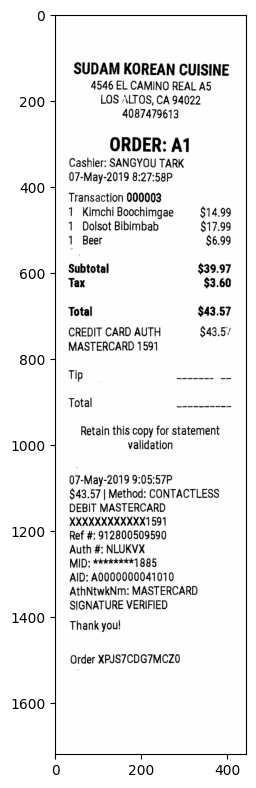

(1720, 445, 3)


In [6]:
plt.rcParams["figure.figsize"] = [2 * x for x in fig_size]
image = get_final_image(file)
plt.imshow(image)
plt.show()
print(image.shape)

In [13]:
results = ts.image_to_data(image, 
output_type=Output.DICT)
df = pd.DataFrame(data= results)
df = df[df.text != '']
df = df.apply(clean_the_text,axis= 1)
product_lines = get_lines(df)
del_suffix(product_lines)
additional_data = process_additional_data(product_lines)
to_del = []
for line in product_lines:
    if line >= additional_data['limit']:
        to_del.append(line)
for line in to_del:
    product_lines.pop(line)
isolate_products(product_lines)
formats = []
for line in product_lines:
    formats.append(get_format(product_lines[line]))
chosen_format = most_frequent(formats)
product_list = pd.DataFrame(columns=chosen_format)
for line in product_lines:
    if follow_format(product_lines[line],chosen_format):
        product_list.loc[len(product_list.index)] = get_data(product_lines[line],chosen_format)
print(additional_data)
product_list

{'state': '', 'subtotal': 39.97, 'costs': 3.6000000000000014, 'total': 43.57, 'limit': 578}


,quantity,desc,price
0,1,Kimchi Boochimgae,$14.99
1,1,Dolsot Bibimbab,$17.99
2,1,Beer,$6.99


In [9]:
additional_data

{'state': '',
 'subtotal': 39.97,
 'costs': 3.6000000000000014,
 'total': 43.57,
 'limit': 578}

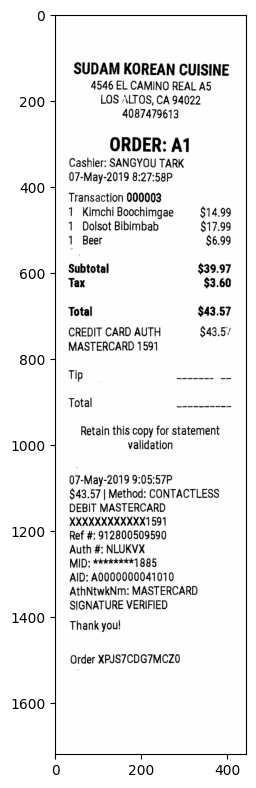

In [10]:
plt.imshow(image)
plt.show()

In [8]:
def extract_dates_from_text(text):
    date_pattern = r'\b\d{1,2}[-/]\d{1,2}[-/]\d{2,4}\b|\b\d{4}[-/]\d{1,2}[-/]\d{1,2}\b|\b\d{1,2}\s(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{2,4}\b|\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s\d{1,2},?\s\d{2,4}\b|\b\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{2,4}\b'
    matches = re.findall(date_pattern, text)
    return matches
def find_date(df):
    for word in df.text:
        if extract_dates_from_text(word):
            return(extract_dates_from_text(word)[0])

['05/12/2019']
